Code and datat Copied from Doug's notebook

In [2]:
workdir = "/SNS/users/lj7/dv/sns-chops/detcalib/ARCS/out/"
%cd {workdir}

/SNS/users/lj7/dv/sns-chops/detcalib/ARCS/out


In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [5]:
def t0_function(x, t_off, A_lo, p_lo, A_hi, p_hi, Ecross, Wcross):
    '''
    Fit emission times at low and high incident energy using a crossover function
    Model low and high parts as power laws
    Using tanh() with a crossover energy and width
    x: Incident energy in meV
    t_off: Constant offset
    A_lo,p_lo: Amplitude and power for low energy part
    A_hi,p_hi: Amplitude and power for high energy part
    Ecross: crossover energy
    Wcross: crossover width
    '''
    f_hi = 0.5*(1. + np.tanh((x - Ecross)/Wcross))
    f_lo = 1.-f_hi
    g_hi = A_hi*np.power(x,p_hi)
    g_lo = A_lo*np.power(x,p_lo)
    
    return t_off + f_lo*g_lo + f_hi*g_hi

```
[[Model]]
    Model(t0_function)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 39
    # data points      = 150
    # variables        = 5
    chi-square         = 601.582779
    reduced chi-square = 4.14884675
    Akaike info crit   = 218.339328
    Bayesian info crit = 233.392504
[[Variables]]
    t_off:   0.37039992 +/- 0.27028871 (72.97%) (init = 0)
    A_lo:    63.7810912 +/- 2.59843792 (4.07%) (init = 100)
    p_lo:   -0.1 (fixed)
    A_hi:    121.432522 +/- 6.85659967 (5.65%) (init = 100)
    p_hi:   -0.5 (fixed)
    Ecross:  65.8030518 +/- 6.60758717 (10.04%) (init = 130)
    Wcross:  80.6125095 +/- 7.85095173 (9.74%) (init = 50)
[[Correlations]] (unreported correlations are < 0.100)
    C(t_off, A_hi)    = -0.959
    C(A_lo, Ecross)   = -0.909
    C(A_lo, Wcross)   =  0.753
    C(Ecross, Wcross) = -0.746
    C(A_hi, Wcross)   = -0.538
    C(t_off, Wcross)  =  0.460
    C(A_lo, A_hi)     = -0.316
    C(t_off, A_lo)    =  0.262
    C(A_hi, Ecross)   =  0.156
    C(t_off, Ecross)  = -0.129
```

<IPython.core.display.Javascript object>


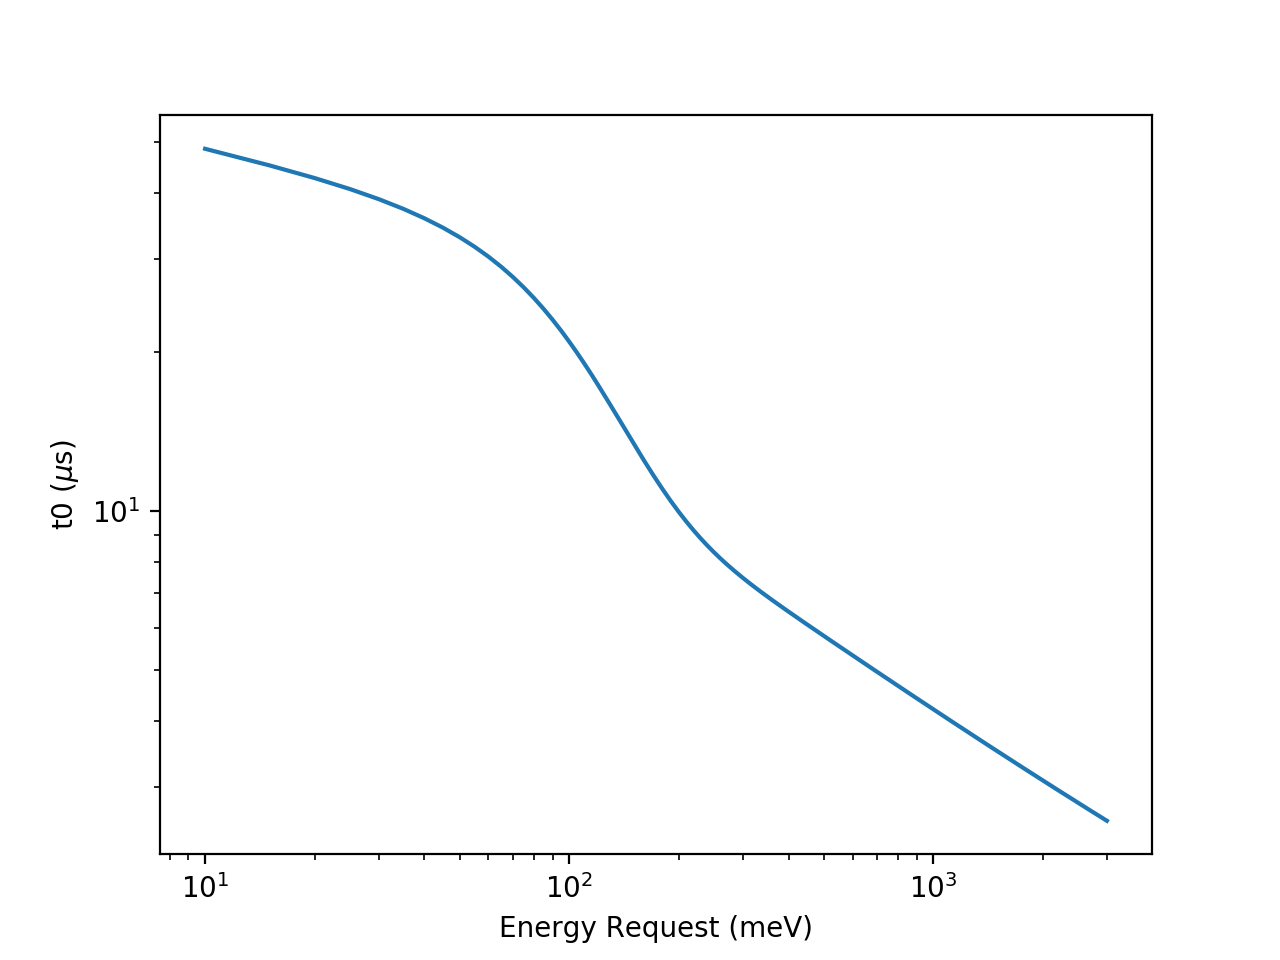

In [6]:
# Let's plot this function to see what it looks like
x = np.arange(10.0, 3000, 5)
y = t0_function(
    x, 
    t_off= 0.37039992, 
    A_lo=63.7810912,
    p_lo=-0.1,
    A_hi=121.432522,
    p_hi=-0.5,
    Ecross=65.8030518,
    Wcross=80.6125095,
)
f2,ax2=plt.subplots()
ax2.plot(x,y)
ax2.loglog()
ax2.set_ylabel('t0 ($\mu$s)')
ax2.set_xlabel('Energy Request (meV)')

In [7]:
import sys
sys.path.insert(0, "/SNS/users/lj7/dv/sns-chops/detcalib/ARCS/lib/")

In [8]:
import calibrate

<IPython.core.display.Javascript object>


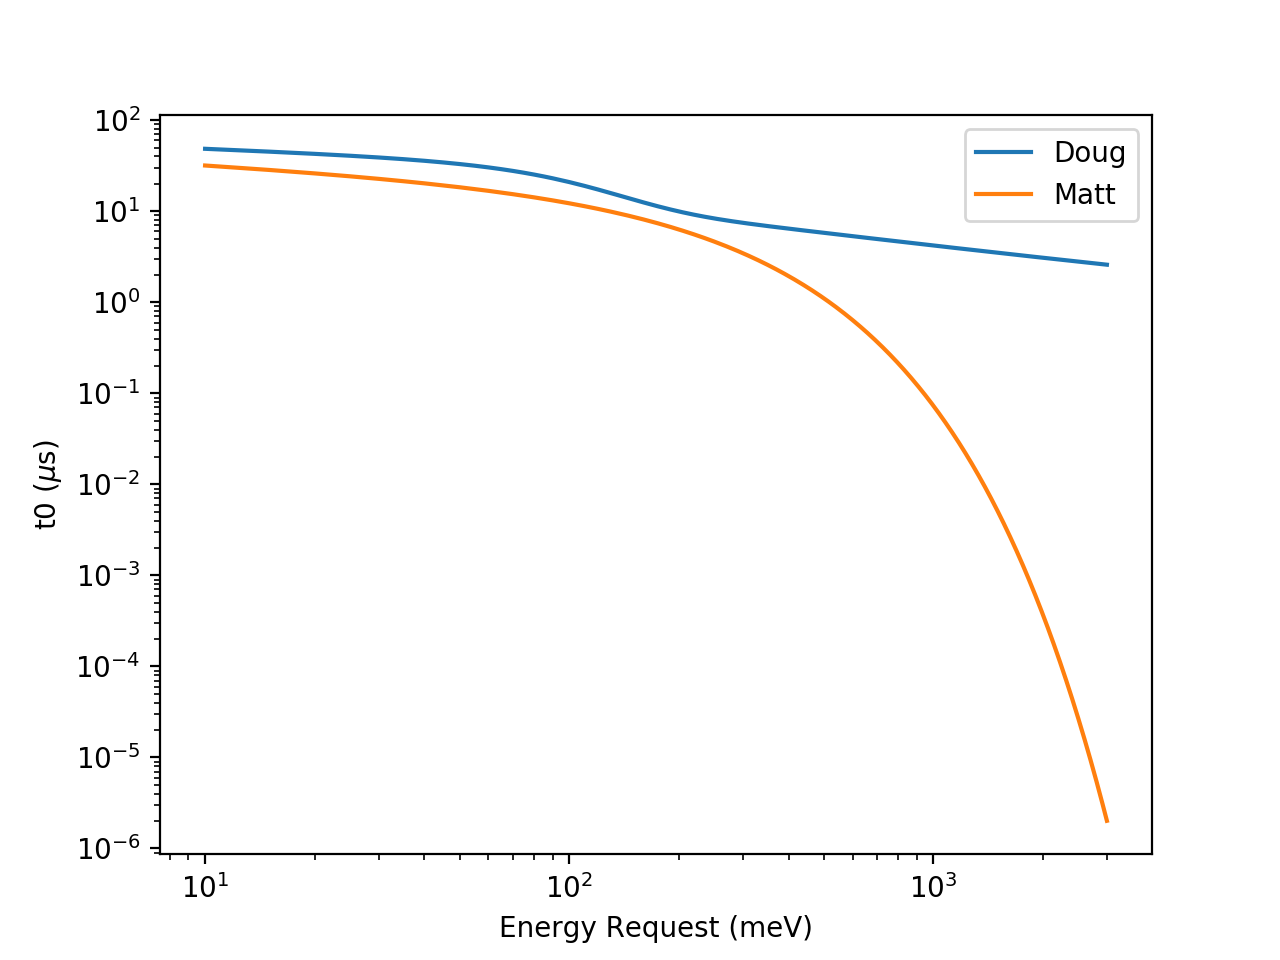

In [9]:
# Let's plot this function to see what it looks like
x = np.arange(10.0, 3000, 5)
y = t0_function(
    x, 
    t_off= 0.37039992, 
    A_lo=63.7810912,
    p_lo=-0.1,
    A_hi=121.432522,
    p_hi=-0.5,
    Ecross=65.8030518,
    Wcross=80.6125095,
)
f2,ax2=plt.subplots()
ax2.plot(x,y, label='Doug')
ax2.plot(x, calibrate.SEQ_T0_of_E(x), label='Matt')
ax2.loglog()
ax2.set_ylabel('t0 ($\mu$s)')
ax2.set_xlabel('Energy Request (meV)')
ax2.legend()

In [11]:
reload(calibrate)

<module 'calibrate' from '/SNS/users/lj7/dv/sns-chops/detcalib/ARCS/lib/calibrate.pyc'>

<IPython.core.display.Javascript object>


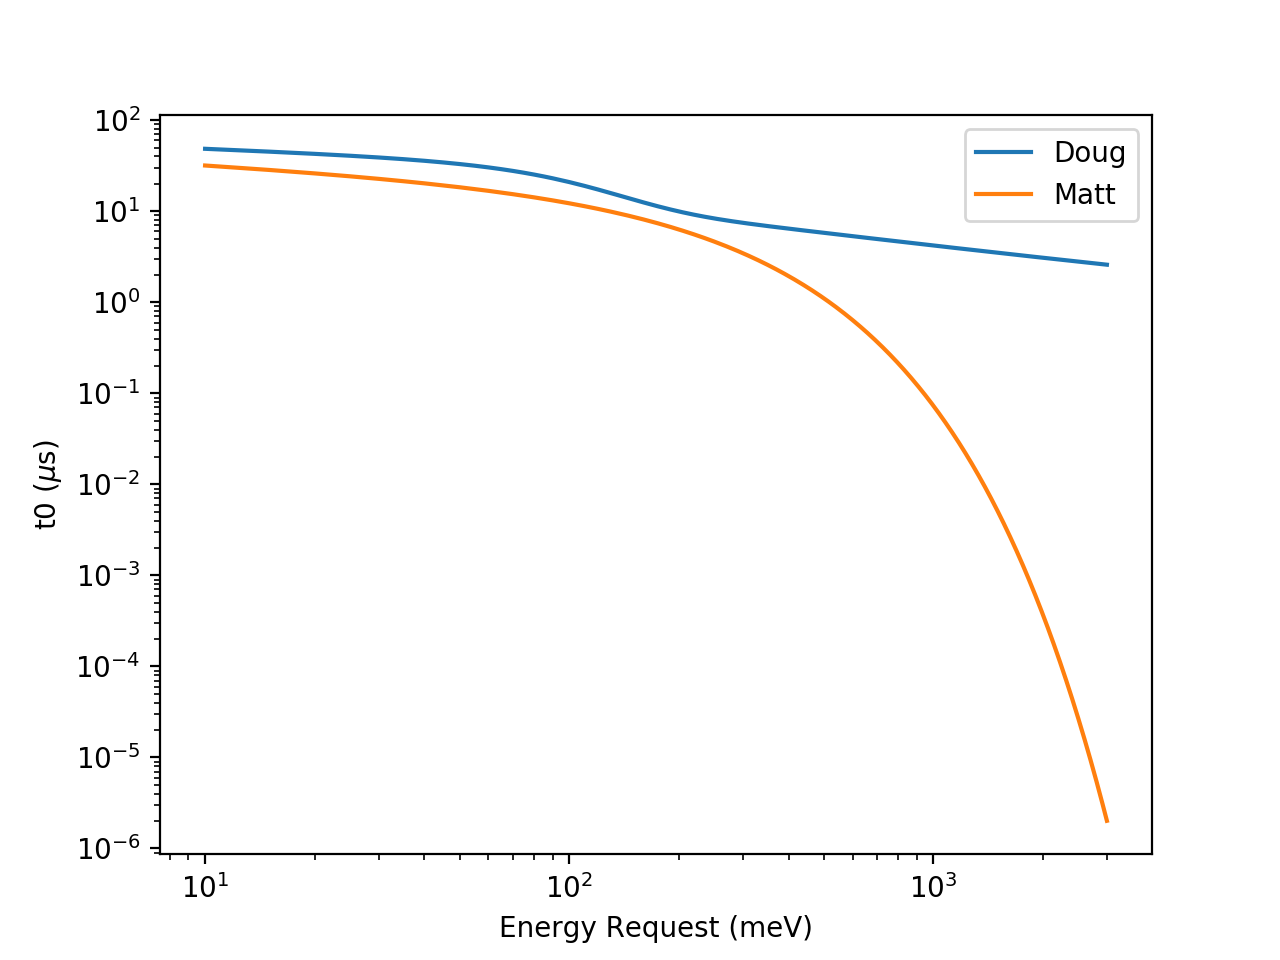

In [12]:
# Let's plot this function to see what it looks like
x = np.arange(10.0, 3000, 5)
y = calibrate.ARCS_T0_of_E(x)
f2,ax2=plt.subplots()
ax2.plot(x,y, label='Doug')
ax2.plot(x, calibrate.SEQ_T0_of_E(x), label='Matt')
ax2.loglog()
ax2.set_ylabel('t0 ($\mu$s)')
ax2.set_xlabel('Energy Request (meV)')
ax2.legend()